In [1]:
from pathlib import Path
import duckdb
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = Path.home() / 'OneDrive - Seagroup/ai/kaggle_dataset/child-mind-institute-detect-sleep-states'
plt.style.use('ggplot')

In [4]:
file = next(path.glob('clean*.parquet'))
query = f"""select * from read_parquet('{file}') --limit 5"""
df = duckdb.sql(query).pl()
df

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

series_id,step,anglez,enmo,timestamp,is_wakeup,grass_date,grass_hour
str,i32,f32,f32,datetime[μs],i64,str,str
"""038441c925bb""",0,2.6367,0.0217,2018-08-14 19:30:00,null,"""2018-08-14""","""19:30:00"""
"""038441c925bb""",1,2.6368,0.0215,2018-08-14 19:30:05,null,"""2018-08-14""","""19:30:05"""
"""038441c925bb""",2,2.637,0.0216,2018-08-14 19:30:10,null,"""2018-08-14""","""19:30:10"""
"""038441c925bb""",3,2.6368,0.0213,2018-08-14 19:30:15,null,"""2018-08-14""","""19:30:15"""
"""038441c925bb""",4,2.6368,0.0215,2018-08-14 19:30:20,null,"""2018-08-14""","""19:30:20"""
"""038441c925bb""",5,2.6367,0.0217,2018-08-14 19:30:25,null,"""2018-08-14""","""19:30:25"""
"""038441c925bb""",6,2.6367,0.0217,2018-08-14 19:30:30,null,"""2018-08-14""","""19:30:30"""
"""038441c925bb""",7,2.6367,0.0218,2018-08-14 19:30:35,null,"""2018-08-14""","""19:30:35"""
"""038441c925bb""",8,2.798,0.0223,2018-08-14 19:30:40,null,"""2018-08-14""","""19:30:40"""


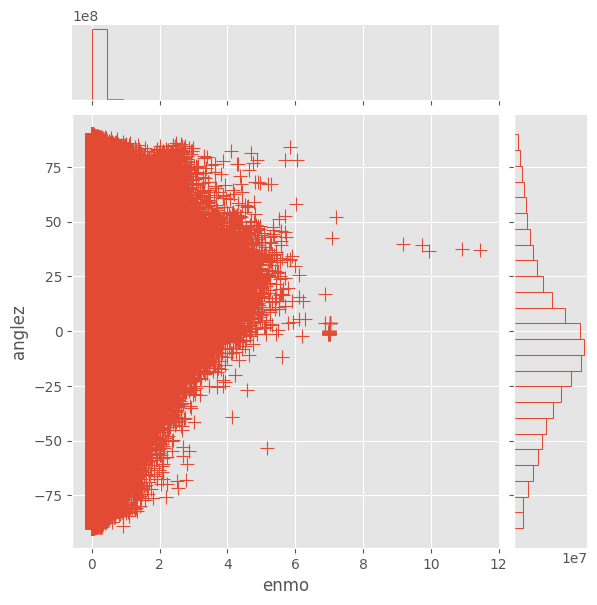

In [5]:
sns.jointplot(data=df, x="enmo", y="anglez", marker="+", s=100, marginal_kws=dict(bins=25, fill=False))